In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib notebook
sns.set_context('paper',)

def pubFigStyle():
    plt.rcParams['svg.fonttype'] = 'none'

    sns.set_style('ticks')
    sns.set_context("paper", rc={"font.size":5,"axes.titlesize":3,"axes.labelsize":7,'lines.linewidth' : 1,'lines.markersize' :1,
                                 'xtick.labelsize' : 6,'ytick.labelsize' : 6,'legend.fontsize':6,'legend.fancybox':False,
                                'legend.frameon':False})   
pubFigStyle()

In [213]:
'''
scalePos	camPos
1	520.1335
2	520.01422
3	519.8735
4	519.67213
5	519.4282
6	519.1148
7	518.7495
8	518.1688
9	517.4098
10	516.3109
11	514.5466
12	511.6052
12.5	509.2036
13	505.3075
13.5	499.1794
14	487.208
14.5	449.785

'''

'\nscalePos\tcamPos\n1\t520.1335\n2\t520.01422\n3\t519.8735\n4\t519.67213\n5\t519.4282\n6\t519.1148\n7\t518.7495\n8\t518.1688\n9\t517.4098\n10\t516.3109\n11\t514.5466\n12\t511.6052\n12.5\t509.2036\n13\t505.3075\n13.5\t499.1794\n14\t487.208\n14.5\t449.785\n\n'

In [13]:
df=pd.read_clipboard()
df.to_csv('spaceCalRaw.csv')

In [14]:
def dfCalc(d):
    df=d.copy()
    df['objSize']=(15-df['scalePos'])*2
    df['objDist']=100*(objPos-df['camPos'])
    df['flyAngle']=2*np.rad2deg(np.arctan(df.objSize/(2*flyScreenDist)))
    df['rwAngle']=2*np.rad2deg(np.arctan(objSize/(2*df.objDist)))

    df['chordLen']=2*(objSize/2)*np.cos(np.deg2rad(df.rwAngle/2))
    df['corrObjDist']=df.objDist-((objSize/2)*np.sin(np.deg2rad(df.rwAngle/2)))
    df['corrExpAngle']=2*np.rad2deg(np.arctan(df.chordLen/(2*df.corrObjDist)))    
    

    return df

In [10]:
objPos=525
flyScreenDist=10
objSize=800
absErr=0.2

In [17]:
df=pd.read_csv('spaceCalRaw.csv',index_col=0)
df=dfCalc(df)
df=df.sort_values('flyAngle')

dfU=df.copy()
dfD=df.copy()


dfU.scalePos+=absErr
dfD.scalePos-=absErr

dfU=dfCalc(dfU)
dfD=dfCalc(dfD)


dfDf=dfD-df
dfUf=dfU-df

<IPython.core.display.Javascript object>


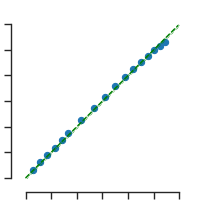

In [27]:
f,ax=plt.subplots(1,1,figsize=(2,2))#,aspect='equal',)
ax.set_aspect('equal','datalim')
# ax=plt.subplot(aspect='equal',)
df.plot(ax=ax,x='flyAngle',y='corrExpAngle',kind='scatter',xerr=[dfDf.flyAngle,dfUf.flyAngle])
ax.plot(range(0,120),range(0,120),'go--',markersize=.2)

ax.set_xlim(0,120)
ax.set_ylim(0,120)
plt.xlabel('VR angle (degrees)')
plt.ylabel('RW angle (degrees)')
sns.despine(offset=10,trim=True)

In [28]:
plt.savefig('VRvsRW_angle.png',transparent=True,papertype='A4',frameon=False,dpi=300)
plt.savefig('VRvsRW_angle.svg',transparent=True,papertype='A4',frameon=False)